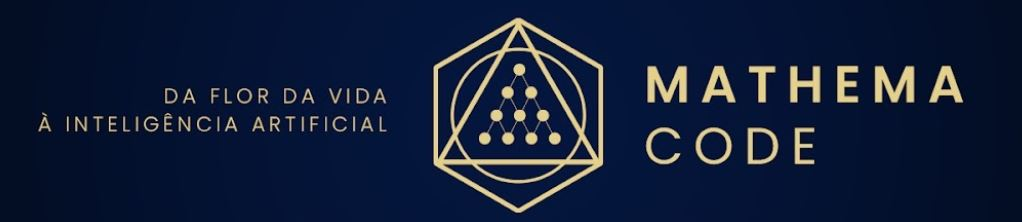

<font size=7>Aula 6 - Escala Razão</font>

# Escalas de medida métrica

## Escalas intervalares e razão


**As escalas intervalares e escalas de razão (ambas métricas) fornecem o mais alto nível de precisão de medida, permitindo que quase todas as operações matemáticas sejam executadas.** Essas duas escalas têm unidades constantes de medida, e, portanto, diferenças entre quaisquer dois pontos adjacentes em qualquer parte da escala são iguais.


A única diferença real entre as escalas intervalares e escalas de razão é que **as primeiras têm um ponto zero natural, enquanto as escalas de razão incluem um ponto de zero absoluto.**

# Escala Razão

1. Exemplos:
 - Comprimento
 - Peso
 - Idade

2. Ponto zero é fixo

3. Medições:
 - Média
 - Desvio Padrão
 - Regressão

4. Gráficos:
 - Linhas
 - Histograma
 - Boxplot
 - Dispersão

In [1]:
# importar o pandas
import pandas as pd
pd.options.display.max_columns = None

In [2]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')

[Dataset de Suicídios](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

In [3]:
# carregar a base de suicídios `datasets/mm.csv`
suicidios = pd.read_csv('datasets/mm.csv', thousands=',', decimal='.')
suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


**O que é cada linha da tabela?**

Número de suicídios de uma faixa-etária, em um ano e em um país

In [4]:
# mostrar as colunas da base de suicídios
suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


In [5]:
# valores únicos e 5 valores mais frequentes de cada coluna
n_unicos = suicidios.nunique()
unicos = suicidios.apply(lambda x: x.value_counts().head().index)
df_temp = pd.concat([n_unicos, unicos], axis=1)
df_temp.columns = ['n_unicos', 'unicos']
df_temp

,n_unicos,unicos
country,101,"Index(['Mauritius', 'Iceland', 'Austria', 'Net..."
year,32,"Int64Index([2009, 2010, 2001, 2000, 2011], dty..."
sex,2,"Index(['female', 'male'], dtype='object')"
age,6,"Index(['75+ years', '25-34 years', '55-74 year..."
suicides_no,2084,"Int64Index([0, 1, 2, 3, 4], dtype='int64')"
population,25564,"Int64Index([24000, 26900, 22000, 20700, 4900],..."
suicides/100k pop,5298,"Float64Index([0.0, 0.29, 0.32, 0.34, 0.37], dt..."
country-year,2321,"Index(['Barbados2003', 'Turkmenistan1997', 'Ar..."
HDI for year,305,"Float64Index([0.713, 0.888, 0.772, 0.761, 0.82..."
gdp_for_year ($),2321,"Int64Index([4794357795, 14128408566, 136280689..."


In [6]:
# Estatística descritiva das variáveis objeto
suicidios.select_dtypes('object').describe()

,country,sex,age,country-year,generation
count,27820,27820,27820,27820,27820
unique,101,2,6,2321,6
top,Mauritius,female,75+ years,Barbados2003,Generation X
freq,382,13910,4642,12,6408


In [7]:
# Estatística descritiva das variáveis numérica
suicidios.select_dtypes('number').describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


In [8]:
# Criar tabela com número de suicídios de cada país por faixa etária por sexo ao longo dos anos 
suicidios.pivot_table(
    values='suicides/100k pop',
    index=['country', 'age'],
    columns=['year', 'sex'],
    aggfunc='sum'
)

year                     1985        1986        1987         1988        \
sex                    female male female male female  male female  male   
country    age                                                             
Albania    15-24 years    NaN  NaN    NaN  NaN   4.83  6.71   2.71  5.33   
           25-34 years    NaN  NaN    NaN  NaN   1.56  3.28   1.91  1.79   
           35-54 years    NaN  NaN    NaN  NaN   2.15  5.19   1.41  4.46   
           5-14 years     NaN  NaN    NaN  NaN   0.00  0.00   0.00  0.00   
           55-74 years    NaN  NaN    NaN  NaN   0.00  0.73   2.03  2.85   
...                       ...  ...    ...  ...    ...   ...    ...   ...   
Uzbekistan 25-34 years    NaN  NaN    NaN  NaN    NaN   NaN    NaN   NaN   
           35-54 years    NaN  NaN    NaN  NaN    NaN   NaN    NaN   NaN   
           5-14 years     NaN  NaN    NaN  NaN    NaN   NaN    NaN   NaN   
           55-74 years    NaN  NaN    NaN  NaN    NaN   NaN    NaN   NaN   
           75+ years      NaN  NaN    NaN  NaN    NaN   NaN    NaN   NaN   

year                     1989         1990          1991          1992         \
sex                    female  male female   male female   male female   male   
country    age                                                                  
Albania    15-24 years   1.67  3.71    NaN    NaN    NaN    NaN   2.39   3.41   
           25-34 years   0.75  6.35    NaN    NaN    NaN    NaN   1.50   2.85   
           35-54 years   2.43  4.71    NaN    NaN    NaN    NaN   0.62   3.49   
           5-14 years    0.00  0.00    NaN    NaN    NaN    NaN   0.00   0.00   
           55-74 years   0.67  4.22    NaN    NaN    NaN    NaN   0.61   3.13   
...                       ...   ...    ...    ...    ...    ...    ...    ...   
Uzbekistan 25-34 years    NaN   NaN   5.23  17.28   4.27  17.53   4.58  14.81   
           35-54 years    NaN   NaN   6.97  22.99   4.64  23.37   4.05  19.42   
           5-14 years     NaN   NaN   0.79   1.63   0.27   1.87   0.30   1.79   
           55-74 years    NaN   NaN   8.99  19.54   6.66  17.81   6.24  14.96   
           75+ years      NaN   NaN  12.36  16.91  13.88  17.32  12.45  15.14   

year                     1993          1994          1995          1996  \
sex                    female   male female   male female   male female   
country    age                                                            
Albania    15-24 years   3.51   7.40   2.12   2.48   4.59   4.56   5.56   
           25-34 years   2.67   3.91   1.53   2.59   2.65   5.58   3.73   
           35-54 years   2.11   2.85   0.58   2.48   2.24   3.72   2.49   
           5-14 years    0.29   0.27   0.00   0.27   0.57   1.59   0.28   
           55-74 years   1.18   4.24   0.57   6.42   1.11   5.06   0.55   
...                       ...    ...    ...    ...    ...    ...    ...   
Uzbekistan 25-34 years   4.71  16.21   4.38  15.50   4.51  16.04   5.55   
           35-54 years   3.62  20.31   4.17  21.52   4.15  23.28   3.88   
           5-14 years    0.25   1.67   0.10   1.08   0.24   1.25   0.33   
           55-74 years   6.54  15.19   5.64  19.20   6.69  21.06   5.73   
           75+ years    10.45  16.81  12.21  10.49   7.50  11.84   9.02   

year                            1997          1998          1999         \
sex                      male female   male female   male female   male   
country    age                                                            
Albania    15-24 years   6.98   7.14  13.50  10.83  10.85   6.40   9.58   
           25-34 years   5.95   5.84  15.25   3.63  10.82   4.70   7.84   
           35-54 years   3.16   1.89   7.88   2.42   7.47   1.34   7.93   
           5-14 years    0.53   1.66   1.05   0.27   0.51   0.27   0.00   
           55-74 years   1.67   0.00   6.66   3.19   4.90   3.18   7.56   
...                       ...    ...    ...    ...    ...    ...    ...   
Uzbekistan 25-34 years  19.36   4.88  17.02   5.16  16.94   5.32  19.93   

In [9]:
# Criar tabela com número de suicídios de cada país por faixa etária por sexo ao longo dos anos 
suicidios_por_ano = suicidios.pivot_table(
    values='suicides/100k pop',
    index='year',
    columns='country',
    aggfunc='sum'
)
suicidios_por_ano

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Dominica,Ecuador,El Salvador,Estonia,Fiji,Finland,France,Georgia,Germany,Greece,Grenada,Guatemala,Guyana,Hungary,Iceland,Ireland,Israel,Italy,Jamaica,Japan,Kazakhstan,Kiribati,Kuwait,Kyrgyzstan,Latvia,Lithuania,Luxembourg,Macau,Maldives,Malta,Mauritius,Mexico,Mongolia,Montenegro,Netherlands,New Zealand,Nicaragua,Norway,Oman,Panama,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.00,134.47,NaN,NaN,163.41,384.81,NaN,4.76,20.12,61.72,NaN,332.04,NaN,NaN,59.18,303.12,NaN,166.46,108.91,62.56,69.46,NaN,NaN,NaN,NaN,NaN,0.0,82.52,NaN,NaN,NaN,NaN,348.90,NaN,NaN,58.17,25.08,NaN,NaN,NaN,171.05,102.16,112.03,133.40,9.04,300.47,NaN,NaN,11.20,NaN,NaN,NaN,247.39,NaN,NaN,8.76,143.13,38.17,NaN,NaN,159.89,153.64,NaN,NaN,NaN,51.06,39.42,NaN,NaN,164.82,154.61,NaN,146.65,NaN,NaN,NaN,NaN,32.79,NaN,NaN,156.18,353.36,NaN,NaN,NaN,114.93,558.72,470.84,NaN,NaN,82.54,30.17,NaN,NaN,NaN,NaN,116.45,184.72,178.61,NaN
1986,NaN,0.00,152.90,NaN,NaN,175.79,401.80,NaN,NaN,NaN,36.73,NaN,314.69,19.37,NaN,57.16,275.48,NaN,190.11,90.94,50.11,89.84,NaN,NaN,NaN,NaN,NaN,NaN,76.54,NaN,NaN,NaN,NaN,351.77,NaN,NaN,61.21,NaN,42.84,NaN,NaN,215.10,104.88,130.28,131.05,0.57,323.55,NaN,NaN,8.74,NaN,NaN,NaN,183.05,NaN,NaN,3.61,30.07,45.74,NaN,NaN,158.28,178.67,NaN,163.62,NaN,60.91,26.76,NaN,NaN,165.53,178.23,NaN,143.31,NaN,NaN,NaN,59.95,0.00,NaN,NaN,23.26,324.61,NaN,NaN,NaN,119.83,529.80,211.99,NaN,NaN,71.91,123.13,NaN,NaN,NaN,NaN,112.01,191.65,172.47,NaN
1987,31.85,0.00,144.98,NaN,NaN,188.82,405.88,NaN,13.59,25.68,29.46,NaN,327.76,31.41,NaN,70.12,308.40,NaN,179.33,89.42,45.17,85.56,NaN,NaN,NaN,NaN,NaN,NaN,62.53,NaN,NaN,NaN,347.35,331.03,NaN,NaN,63.06,NaN,57.92,NaN,NaN,209.94,95.42,133.61,125.54,7.78,295.29,NaN,NaN,11.47,NaN,NaN,NaN,243.24,NaN,NaN,18.87,171.94,41.43,NaN,NaN,157.17,210.52,NaN,191.56,NaN,67.06,36.60,NaN,NaN,171.33,143.76,NaN,128.24,NaN,NaN,NaN,141.42,0.00,NaN,NaN,60.72,273.56,NaN,NaN,NaN,122.14,NaN,251.70,230.91,NaN,81.82,155.54,NaN,173.61,294.04,NaN,103.81,191.66,164.43,NaN
1988,32.46,0.00,146.24,NaN,NaN,179.32,357.64,NaN,NaN,24.80,57.39,NaN,283.80,NaN,NaN,65.36,292.49,NaN,175.38,94.90,50.64,88.98,NaN,NaN,NaN,NaN,NaN,NaN,75.29,NaN,NaN,NaN,354.04,312.72,NaN,NaN,60.12,46.80,47.24,91.92,NaN,167.98,113.24,124.16,121.81,4.20,284.72,NaN,NaN,NaN,NaN,NaN,NaN,211.50,NaN,NaN,28.61,246.11,42.22,NaN,NaN,147.60,205.03,NaN,208.50,NaN,60.19,NaN,NaN,NaN,137.75,161.69,NaN,114.58,NaN,NaN,NaN,182.21,NaN,NaN,NaN,NaN,360.19,NaN,NaN,NaN,127.28,NaN,209.72,231.67,NaN,NaN,228.75,NaN,162.45,286.72,NaN,114.55,187.71,164.46,NaN
1989,33.40,0.00,138.93,NaN,NaN,168.11,359.32,NaN,NaN,NaN,73.58,NaN,284.85,5.16,NaN,64.02,292.19,NaN,170.98,100.44,41.69,84.77,NaN,NaN,NaN,NaN,NaN,NaN,70.38,NaN,NaN,NaN,373.36,312.53,NaN,NaN,54.53,65.09,35.23,184.88,NaN,110.12,110.56,170.32,116.64,0.00,263.42,NaN,NaN,NaN,NaN,NaN,NaN,261.32,NaN,NaN,89.96,211.64,48.26,NaN,NaN,136.01,190.62,NaN,197.89,NaN,55.29,35.33,NaN,NaN,130.32,169.54,NaN,121.40,157.77,398.82,NaN,88.91,NaN,NaN,NaN,NaN,354.11,NaN,NaN,NaN,126.49,NaN,212.12,238.34,NaN,NaN,198.16,NaN,135.33,316.32,NaN,99.19,182.44,196.46,NaN
1990,NaN,17.24,134.90,41.12,NaN,172.35,353.78,24.61,NaN,NaN,121.23,274.37,277.11,29.70,NaN,67.06,256.43,NaN,165.02,91.86,43.43,93.27,NaN,NaN,NaN,314.22,NaN,NaN,60.48,184.46,NaN,NaN,396.22,302.73,64.43,259.45,51.49,2

In [10]:
# Qual o ano mais recente com menos nulos?
suicidios_por_ano.T.notna().sum().sort_index(ascending=False)

year
2016    16
2015    62
2014    78
2013    80
2012    81
2011    86
2010    88
2009    89
2008    85
2007    86
2006    85
2005    84
2004    84
2003    86
2002    86
2001    88
2000    86
1999    83
1998    79
1997    77
1996    77
1995    78
1994    68
1993    65
1992    65
1991    64
1990    64
1989    52
1988    49
1987    54
1986    48
1985    48
dtype: int64

In [11]:
# cria série com nro de suicídios em 2014
suicidios_2014 = suicidios_por_ano.T[2014]
suicidios_2014

country
Albania                    NaN
Antigua and Barbuda       0.00
Argentina               111.35
Armenia                  37.01
Aruba                      NaN
                         ...  
United Arab Emirates       NaN
United Kingdom           83.93
United States           171.33
Uruguay                 248.64
Uzbekistan               85.12
Name: 2014, Length: 101, dtype: float64

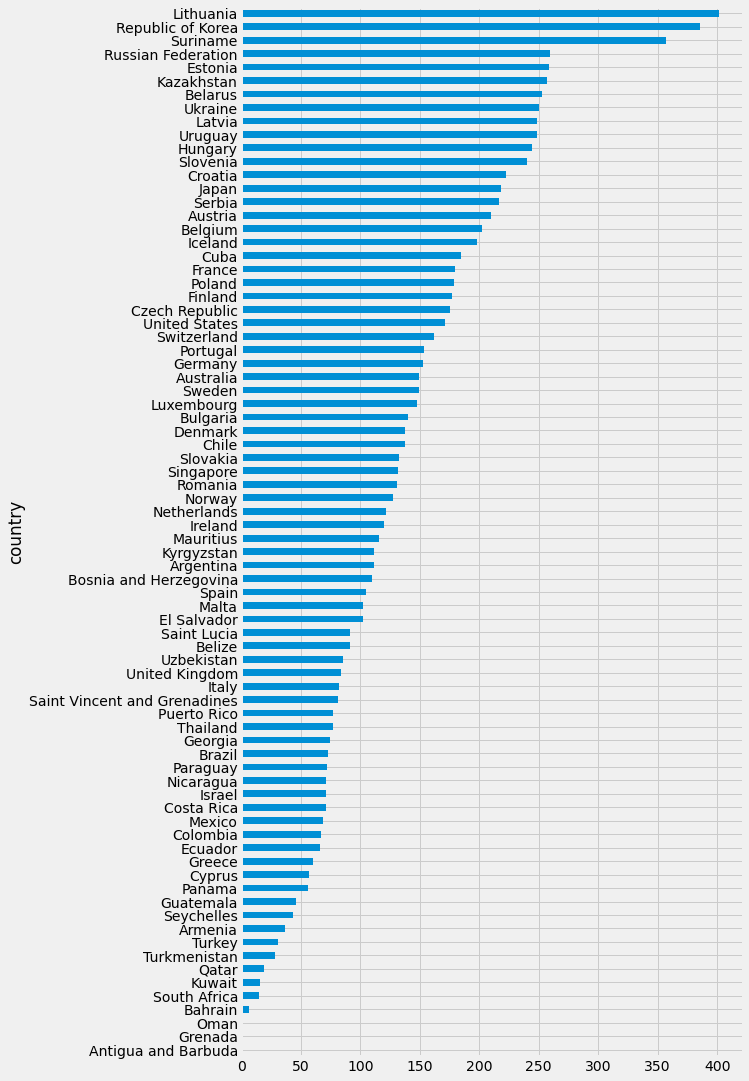

In [12]:
# plota gráfico de barras horizontais de suicídios por ano
suicidios_2014.dropna().sort_values(ascending=True).plot.barh(figsize=[8,18]);

In [13]:
# obtém os top 10 países com mais suicídios em um determinado ano
paises_top_10 = suicidios_2014.sort_values(ascending=False).head(10).index
paises_top_10

Index(['Lithuania', 'Republic of Korea', 'Suriname', 'Russian Federation',
       'Estonia', 'Kazakhstan', 'Belarus', 'Ukraine', 'Latvia', 'Uruguay'],
      dtype='object', name='country')

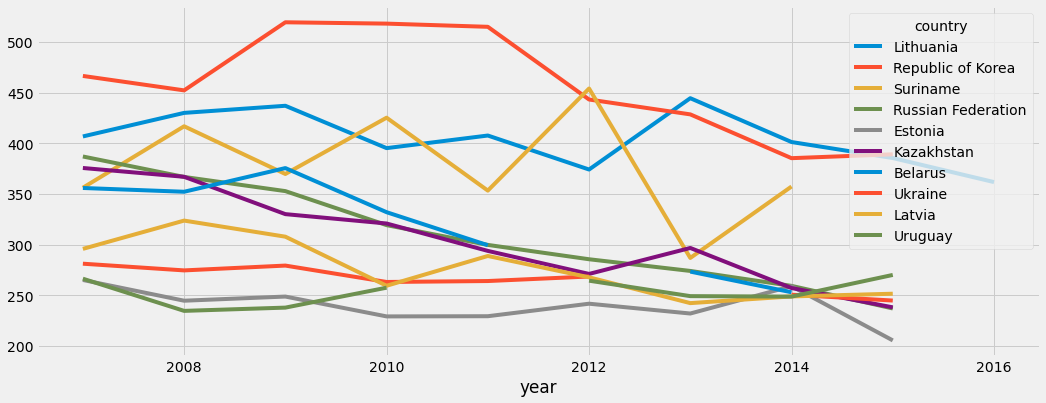

In [14]:
# plotar gráfico de linhas dos suicídios ao longo dos anos dos países top 10
suicidios_por_ano[paises_top_10].iloc[-10:].plot(figsize=(16,6));

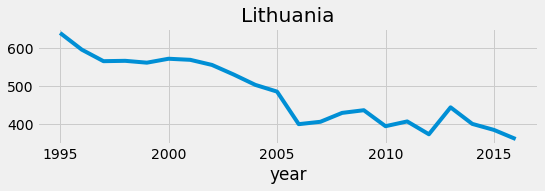

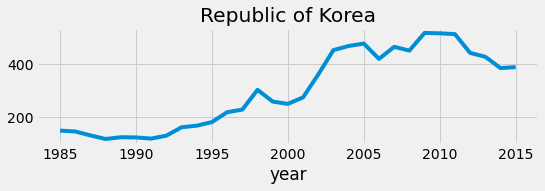

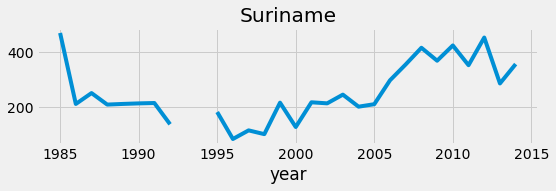

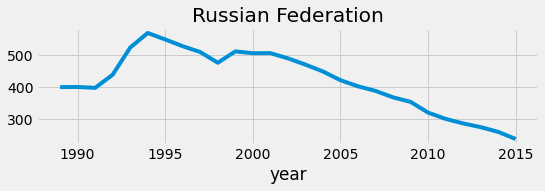

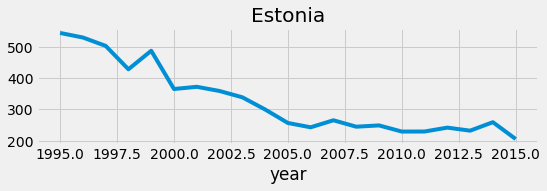

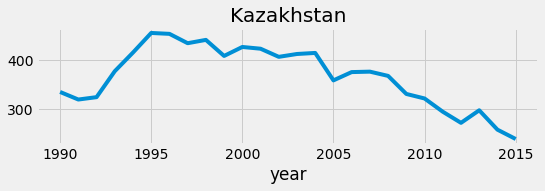

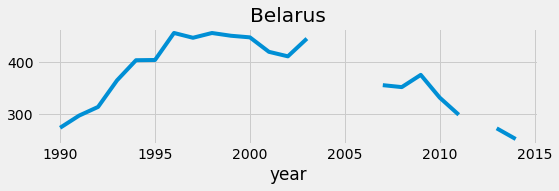

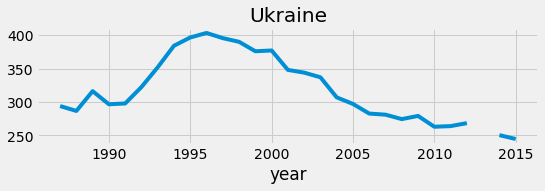

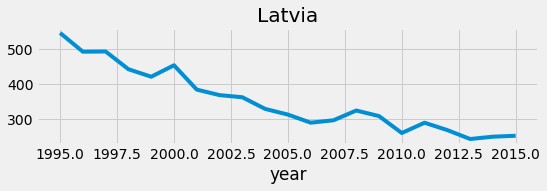

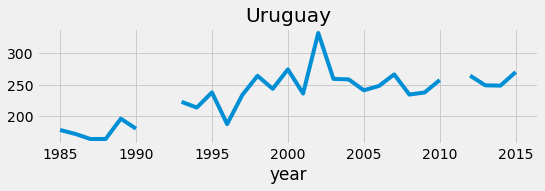

In [15]:
# plotando cada um dos top10 individualmente
for p in paises_top_10:
    suicidios_por_ano[p].plot(title=p, figsize=(8,2))
    plt.show()

In [16]:
# cria dataframe com dos dados de IDH('HDI for year') e PIB per capta ('gdp_per_capita ($)')
df_dados_2014 = suicidios.set_index('country').query('year == 2014')[['HDI for year', 'gdp_per_capita ($)']].drop_duplicates()
df_dados_2014

,HDI for year,gdp_per_capita ($)
country,,
Antigua and Barbuda,0.783,14093
Argentina,0.836,13400
Armenia,0.733,4142
Australia,0.935,66809
Austria,0.885,54278
...,...,...
Ukraine,0.747,3299
United Kingdom,0.907,49906
United States,0.915,58531


In [17]:
# observando a série com o número de suicídios em 2014
suicidios_2014

country
Albania                    NaN
Antigua and Barbuda       0.00
Argentina               111.35
Armenia                  37.01
Aruba                      NaN
                         ...  
United Arab Emirates       NaN
United Kingdom           83.93
United States           171.33
Uruguay                 248.64
Uzbekistan               85.12
Name: 2014, Length: 101, dtype: float64

In [18]:
# adiciona coluna de suicídios em 2014
# PS.: só é possível adicionar a coluna porque os "index" é igual ao do dataframe
df_dados_2014['suicides/100k pop'] = suicidios_2014
df_dados_2014

,HDI for year,gdp_per_capita ($),suicides/100k pop
country,,,
Antigua and Barbuda,0.783,14093,0.00
Argentina,0.836,13400,111.35
Armenia,0.733,4142,37.01
Australia,0.935,66809,149.07
Austria,0.885,54278,209.82
...,...,...,...
Ukraine,0.747,3299,250.50
United Kingdom,0.907,49906,83.93
United States,0.915,58531,171.33


In [19]:
# ordena por número de suicídios ('suicides/100k pop')
df_dados_2014.sort_values('suicides/100k pop', ascending=False,inplace=True)
df_dados_2014

,HDI for year,gdp_per_capita ($),suicides/100k pop
country,,,
Lithuania,0.839,17442,401.27
Republic of Korea,NaN,29120,385.33
Suriname,0.714,10530,357.34
Russian Federation,NaN,15319,259.22
Estonia,0.861,21117,258.91
...,...,...,...
South Africa,0.666,7174,15.08
Bahrain,0.824,27503,6.52
Oman,0.793,22328,1.51


In [20]:
# filtrar e mostrar apenas o Brasil(Brazil) 
df_dados_2014[df_dados_2014.index == 'Brazil']

,HDI for year,gdp_per_capita ($),suicides/100k pop
country,,,
Brazil,0.755,12975,73.13


# Exemplo de Frequencia para Percentual do Benford
- Na Base de Suicidio
- Hypótese:
 - A Frequencia segue de acordo com Benford?

## Benford

In [21]:
import math
import pandas as pd

In [22]:
# criar a régua do Benford
regua_benford = [(str(digito), math.log10(1 + 1/digito)) for digito in range(1, 10)]
regua_benford

[('1', 0.3010299956639812),
 ('2', 0.17609125905568124),
 ('3', 0.12493873660829993),
 ('4', 0.09691001300805642),
 ('5', 0.07918124604762482),
 ('6', 0.06694678963061322),
 ('7', 0.05799194697768673),
 ('8', 0.05115252244738129),
 ('9', 0.04575749056067514)]

In [23]:
# transformar a regua_benford num dataframe
df_regua_benford = pd.DataFrame(regua_benford).set_index(0)
df_regua_benford.columns = ['esperado']
df_regua_benford

,esperado
0,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


In [24]:
# extrair o primeiro dígito de uma coluna numérica
coluna_1dig = df_dados_2014['suicides/100k pop'].dropna().astype(str).str[0]
coluna_1dig

country
Lithuania              4
Republic of Korea      3
Suriname               3
Russian Federation     2
Estonia                2
                      ..
South Africa           1
Bahrain                6
Oman                   1
Grenada                0
Antigua and Barbuda    0
Name: suicides/100k pop, Length: 78, dtype: object

In [25]:
# remover dígito '0'
coluna_1dig = coluna_1dig[coluna_1dig != '0']
coluna_1dig

country
Lithuania             4
Republic of Korea     3
Suriname              3
Russian Federation    2
Estonia               2
                     ..
Qatar                 1
Kuwait                1
South Africa          1
Bahrain               6
Oman                  1
Name: suicides/100k pop, Length: 76, dtype: object

In [26]:
# mostrar distribuição do primeiro dígito
freq_1dig = coluna_1dig.value_counts(normalize=True).sort_index()
freq_1dig

1    0.434211
2    0.197368
3    0.052632
4    0.039474
5    0.039474
6    0.052632
7    0.105263
8    0.052632
9    0.026316
Name: suicides/100k pop, dtype: float64

In [27]:
# criar uma função que recebe uma coluna,
# filtra os valores zeros,
# extrai o primeiro dígito de cada valor e
# retorna as frequências relativas de cada primeiro dígito
def frequencia_coluna(coluna):    
    coluna = coluna.dropna().astype(str).str[0]
    coluna = coluna[coluna != '0']
    freq_dig = coluna.value_counts(normalize = True)
    return freq_dig

In [28]:
# testa função frequencia_coluna 
# em df_dados_2014['suicides/100k pop']
frequencia_coluna(df_dados_2014['suicides/100k pop'])

1    0.434211
2    0.197368
7    0.105263
3    0.052632
8    0.052632
6    0.052632
5    0.039474
4    0.039474
9    0.026316
Name: suicides/100k pop, dtype: float64

In [29]:
# criar função que recebe uma coluna,
# criar um dataframe que compara freq. real e freq. ideal de Benford e
# plotar um gráfico de barras pareadas
def benford(coluna):
    regua = [(str(digito), math.log10(1 + 1/digito)) for digito in range(1, 10)]
    df_comparacao = pd.DataFrame(regua).set_index(0)
    df_comparacao.columns = ["esperado"]
    df_comparacao["real"] = frequencia_coluna(coluna)
        
    x2 = (df_comparacao['esperado'] - df_comparacao['real']).pow(2) / df_comparacao['esperado'] 
    df_comparacao = df_comparacao * 100
    df_comparacao.plot.bar(xlabel='dígitos', ylabel='distribuição da frequência')
    plt.suptitle(coluna.name, y=1.01)
    plt.title(f"Qui-Quadrado = {round(x2.sum(), 2)}", fontsize=12)
    
    df_comparacao['x2'] = (x2).round(2)
    
    return df_comparacao

In [30]:
# traz os n primeiros números da sequência de Fibonacci
def recur_fibo(n):
    a = 0
    b = 1
    r = []
    for i in range(n):
        r.append(a)
        a, b = b, a + b
    return r
recur_fibo(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

,esperado,real,x2
0,,,
1,30.103000,30.130130,0.0
2,17.609126,17.717718,0.0
3,12.493874,12.512513,0.0
4,9.691001,9.509510,0.0
5,7.918125,8.008008,0.0
6,6.694679,6.706707,0.0
7,5.799195,5.605606,0.0
8,5.115252,5.305305,0.0
9,4.575749,4.504505,0.0


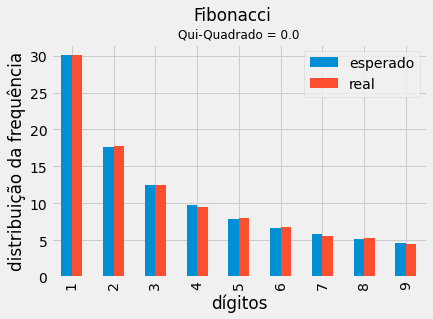

In [31]:
# cria 1000 números Fibonacci em uma série
# e aplica a função benford
fib = pd.Series(recur_fibo(1000), name='Fibonacci')
benford(fib)

,esperado,real,x2
0,,,
1,30.103000,11.111111,0.12
2,17.609126,11.111111,0.02
3,12.493874,11.111111,0.00
4,9.691001,11.111111,0.00
5,7.918125,11.111111,0.01
6,6.694679,11.111111,0.03
7,5.799195,11.111111,0.05
8,5.115252,11.111111,0.07
9,4.575749,11.111111,0.09


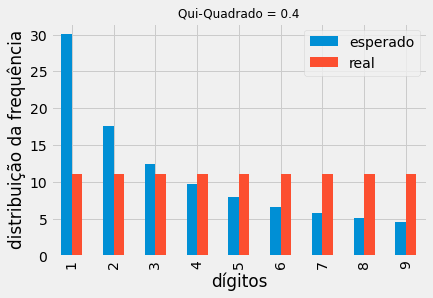

In [32]:
# aplica Benford a uma sequência de números de 0 a 99999
intervalo = pd.Series(range(0,10000))
benford(intervalo)

,esperado,real,x2
0,,,
1,30.103000,43.421053,0.06
2,17.609126,19.736842,0.00
3,12.493874,5.263158,0.04
4,9.691001,3.947368,0.03
5,7.918125,3.947368,0.02
6,6.694679,5.263158,0.00
7,5.799195,10.526316,0.04
8,5.115252,5.263158,0.00
9,4.575749,2.631579,0.01


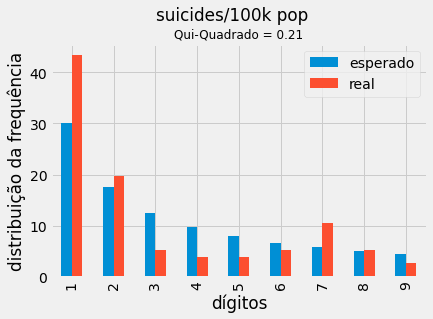

In [33]:
# aplicar a função de benford em um coluna no df
benford(df_dados_2014['suicides/100k pop'])

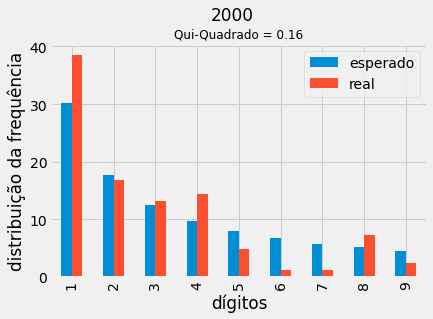

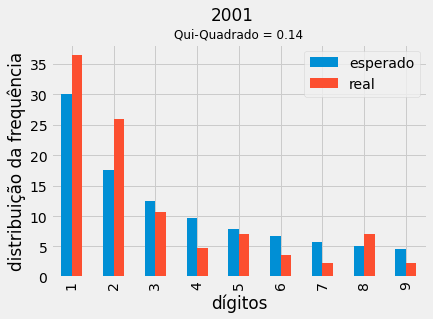

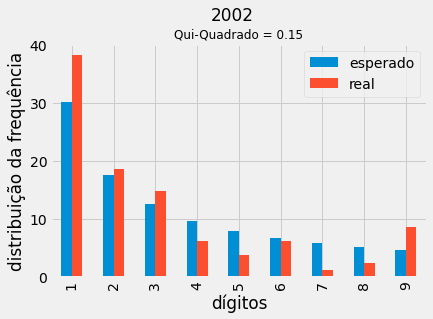

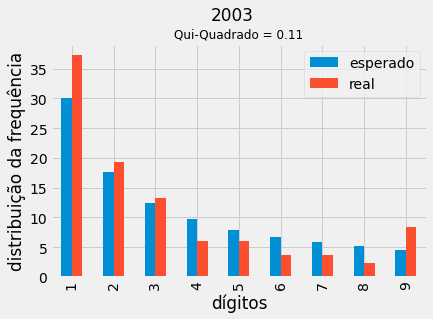

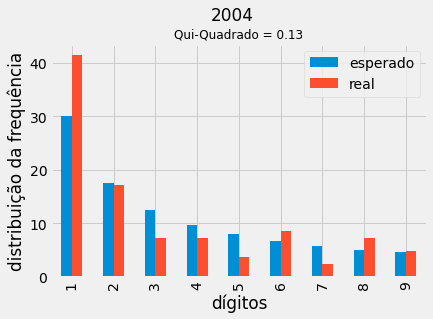

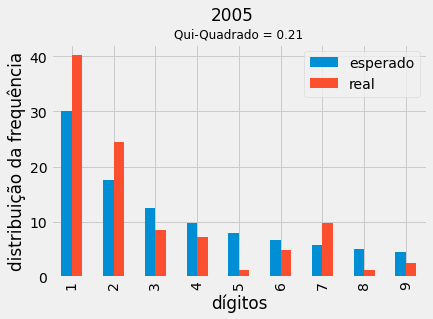

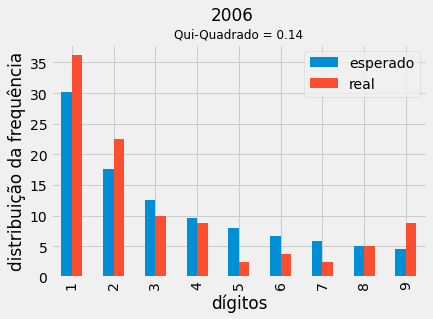

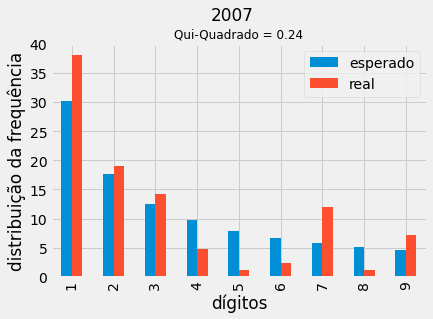

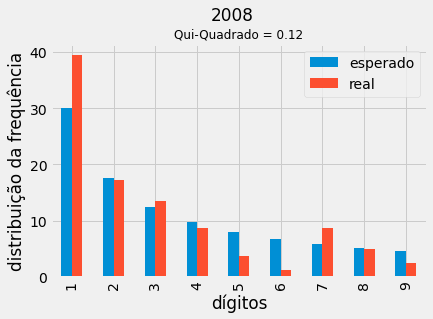

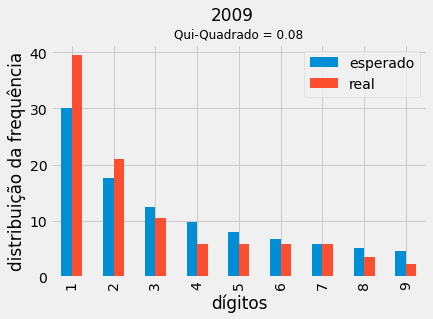

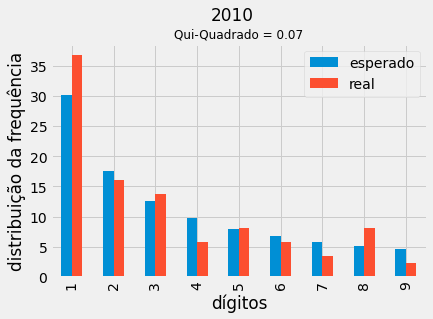

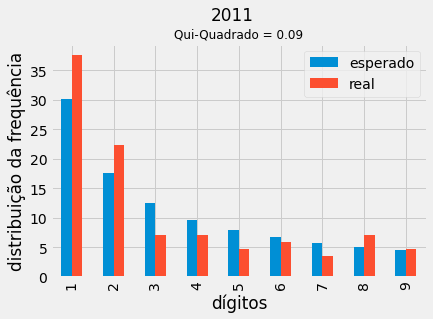

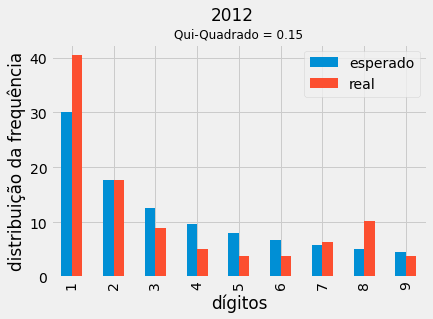

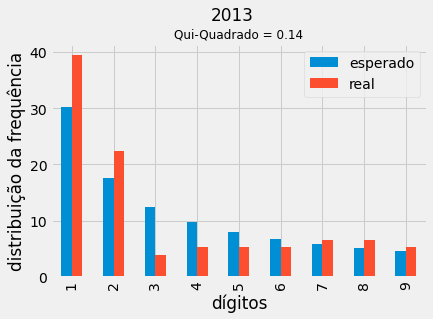

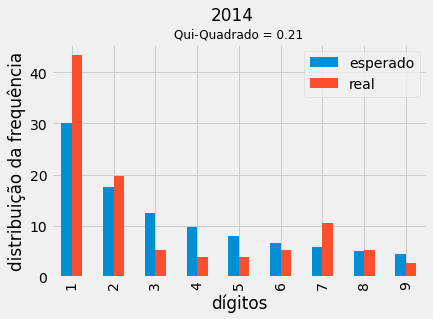

In [34]:
for i in range(15):
    benford(suicidios_por_ano.T[2000 + i]);

In [35]:
candidatos = pd.read_csv('./datasets/candidatos_deputados_2014_final.csv', encoding='latin-1')
candidatos

,SIGLA_UF,CODIGO_CARGO,DESCRICAO_CARGO,NOME_CANDIDATO,SEQUENCIAL_CANDIDATO,COD_SITUACAO_CANDIDATURA,DES_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,CODIGO_LEGENDA,CODIGO_OCUPACAO,DESCRICAO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,DESCRICAO_SEXO,COD_GRAU_INSTRUCAO,DESCRICAO_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,DESCRICAO_ESTADO_CIVIL,CODIGO_COR_RACA,DESCRICAO_COR_RACA,CODIGO_NACIONALIDADE,DESCRICAO_NACIONALIDADE,DESPESA_MAX_CAMPANHA,COD_SIT_TOT_TURNO,DESC_SIT_TOT_TURNO,VALOR_BEM,SETOR_A,SETOR_B,SETOR_C,SETOR_D,SETOR_E,SETOR_F,SETOR_G,SETOR_H,SETOR_I,SETOR_J,SETOR_K,SETOR_L,SETOR_M,SETOR_N,SETOR_O,SETOR_P,SETOR_Q,SETOR_R,SETOR_S,SETOR_NAO_IDENTIFICADO,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
0,AC,7,DEPUTADO ESTADUAL,BENEDITO SILVA BARBOSA,10000000504,2,DEFERIDO,23,10000000034,266,PROFESSOR DE ENSINO MÉDIO,46,2,MASCULINO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,210000.00,0.0,0.0,0.0,0.0,0.0,490.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,200.00,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,690.5,1500.0,2190.50
1,AC,7,DEPUTADO ESTADUAL,MARIA APARECIDA ALVES DE SOUZA,10000000055,2,DEFERIDO,12,10000000021,254,VIGILANTE,32,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,1,BRASILEIRA NATA,600000,5,SUPLENTE,38918.17,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,821.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,821.88,0.0,0.0,821.88
2,AC,7,DEPUTADO ESTADUAL,ASTÉRIO DE PAULA MOREIRA FILHO,10000000206,2,DEFERIDO,51,10000000028,277,DEPUTADO,53,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,1,BRASILEIRA NATA,600000,5,SUPLENTE,493000.00,0.0,0.0,10000.0,0.0,0.0,0.0,20400.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,23605.00,52600.0,0.0,0.0,18100.0,0.0,0.0,0.0,36505.00,17500.0,34500.0,106605.00
3,AC,7,DEPUTADO ESTADUAL,JOSÉ MASTRANGELO FILHO,10000000514,2,DEFERIDO,23,10000000034,171,JORNALISTA E REDATOR,30,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,20000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,6500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,6500.0,6500.00
4,AC,7,DEPUTADO ESTADUAL,CARLOS ANDRÉ MENEZES DE OLIVEIRA,10000000519,2,DEFERIDO,23,10000000034,244,TÉCNICO EM EDIFICAÇÕES,34,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,1,BRASILEIRA NATA,1000000,5,SUPLENTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21119,TO,7,DEPUTADO ESTADUAL,JOÃO FERREIRA DOS SANTOS,270000000186,2,DEFERIDO,20,270000000008,297,SERVIDOR PÚBLICO ESTADUAL,49,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),2,PRETA,1,BRASILEIRA NATA,1500000,5,SUPLENTE,11000.00,0.0,0.0,0.0,0.0,0.0,1000.0,305.05,0.0,0.0,0.0,0.0,0.0,0.0,148.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.05,0.0,0.0,1453.05
21120,TO,7,DEPUTADO ESTADUAL,ANTÔNIO EVANGELISTA PEREIRA JUNIOR,270000000215,2,DEFERIDO,28,270000000008,999,OUTROS,45,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),1,BRANCA,1,BRASILEIRA NATA,1500000,2,ELEITO POR QP,850000.00,0.0,0.0,27700.0,0.0,0.0,0.0,12663.69,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,10000.00,171530.0,0.0,0.0,109600.0,0.0,27700.0,0.0,22663.69,0.0,61930.0,221893.69
21121,TO,6,DEPUTADO FEDERAL,WALTER BARROSO VITORINO JUNIOR,270000000282,2,DEFERIDO,77,270000000010,278,VEREADOR,33,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,1,BRASILEIRA NATA,3000000,5,SUPLENTE,298000.00,0.0,0.0,0.0,0.0,0.0,1000.0,4959.74,0.0,0.0,0.0,0.0,0.0,0.0,2281.47,0.0,0.0,0.0,0.0,10000.00,81683.4,0.0,0.0,71600.0,0.0,0.0,0.0,18241.21,0.0,10083.4,99924.61
21122,TO,7,DEPUTADO ESTADU

,esperado,real,x2
0,,,
1,30.103000,29.597075,0.0
2,17.609126,18.714997,0.0
3,12.493874,12.982265,0.0
4,9.691001,9.310828,0.0
5,7.918125,8.416304,0.0
6,6.694679,6.549471,0.0
7,5.799195,5.273802,0.0
8,5.115252,5.032670,0.0
9,4.575749,4.122589,0.0


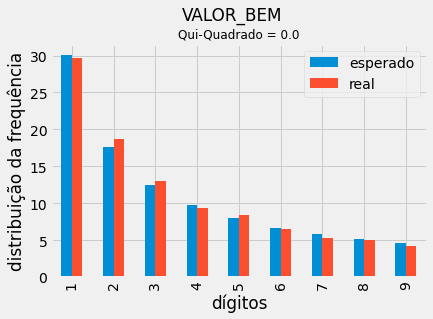

In [36]:
benford(candidatos['VALOR_BEM']) 

,esperado,real,x2
0,,,
1,30.103000,32.170871,0.0
2,17.609126,17.030642,0.0
3,12.493874,11.664127,0.0
4,9.691001,9.322273,0.0
5,7.918125,8.351673,0.0
6,6.694679,7.516506,0.0
7,5.799195,5.225439,0.0
8,5.115252,4.525704,0.0
9,4.575749,4.192766,0.0


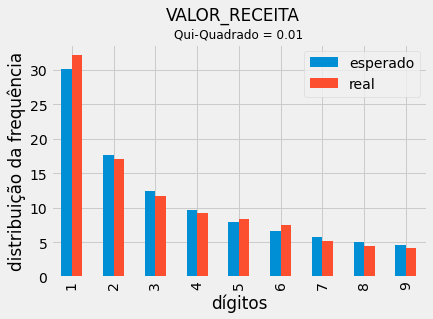

In [37]:
benford(candidatos['VALOR_RECEITA']) 

# Regressão Linear

**Regressão linear** é o processo de encontrar a equação de uma reta por meio dos dados (pontos em um diagrama de dispersão).

De posse da equação da reta, é possível fazer previsões.

In [38]:
from IPython.display import clear_output
from time import sleep
from random import random

,x,y
0,1,2.196790
1,2,0.311423
2,3,1.218756
3,4,3.113228
4,5,3.812986
5,6,7.932948
6,7,7.841145
7,8,9.661195
8,9,10.895732
9,10,9.165260


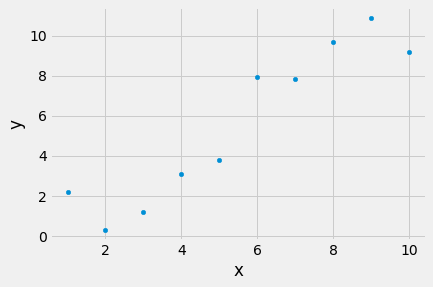

In [39]:
# cria uma base de dados de testes
x = list(range(1, 11))
y = [i + (1 if random() >.5 else -1) * 2 * random() for i in x]
df_teste = pd.Series(x, name='x').to_frame()
df_teste['y'] = y

# plota os dados da coluna x e os y
df_teste.plot.scatter(x='x', y='y')
df_teste

## Regressão Linear com "Gradiente Descendente Caseiro"

In [40]:
# Inicializa variáveis para rodar modelo teste
# gradiente descendente
erros = []
emes = []
# ax + b
a = 0 
b = 0
t = .01 # taxa de variação ao "a"

Variação do Erro:  0.009114128056033177
Ultimos RMSE:
 [2.041655448402865, 2.032541320346832, 2.0435710495479174]


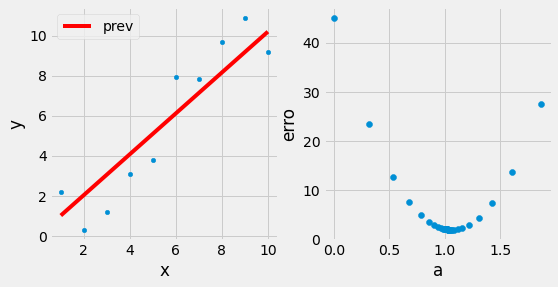

In [41]:
# varia "um pouquinho" o valor do parâmetro "a"
#de modo a encontrar o valor que retorna o menor erro

manual = False
#manual = True
while len(erros) < 2 or  abs(erros[0] - erros[1]) > .01:    
    # plota dados da tabela
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 4))
    df_teste.plot.scatter(x='x', y='y', ax=ax1)

    # faz previsão usando os "a" e "b"     
    df_teste['prev'] = df_teste['x'] * a + b
    # calcula o quadrado do erro
    df_teste['erro'] =  (df_teste['prev'] - df_teste['y']).pow(2)
    # plota a reta resultante da previsão
    df_teste.plot(x='x', y='prev', color='r', ax=ax1)
    
    # calula a mse (erro médio quadrado)
    mse = ((df_teste['erro']/df_teste.shape[0]).sum())
    
    # calcula o erro atual do modelo
    j = (df_teste['prev'] - df_teste['y']).sum() / df_teste.shape[0]
            
    # salva o erro e valor do "a"
    if len(erros) == 0 or mse != erros[0]:
        erros.insert(0, mse)
        emes.insert(0, a)
        
    # altera o "a" um pouquinho (1/3 do erro)
    a = a - j / 3     
    #a = a - j * t
    
    # plota o valor do erro em relação ao valor de "a"
    ax2.scatter(emes, erros)
    ax2.set_xlabel('a')
    ax2.set_ylabel('erro')
    
    # limpa a saída da célula
    clear_output()    
    # imprime os erros
    if len(erros) > 1:
        print('Variação do Erro: ', erros[0] - erros[1])
    print('Ultimos RMSE:\n', erros[:3])    
    
    # mostra a plotagem
    plt.show()   
    
    # aguarda 300ms
    sleep(.3)
    
    if manual:
        break
    

In [42]:
# importa a classe de regressão linear do pacote sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [43]:
# Fazendo a previsão usando o modelo de regressão
# do pacote Scikit-Learn
modelo = LinearRegression()
modelo.fit(X=df_teste[['x']], y=df_teste['y'])
df_teste['prev_sk'] = modelo.predict(df_teste[['x']])

In [44]:
# mostra valores dos coeficiente encontrados
# pelo modelo de gradiente descendente caseiro
a , b

(1.022099602334002, 0)

In [45]:
# mostra valores dos coeficiente encontrados
# pelo modelo do Scikit-Learn
modelo.coef_, modelo.intercept_

(array([1.19589278]), -0.9624639206873518)

<AxesSubplot:xlabel='x', ylabel='y'>

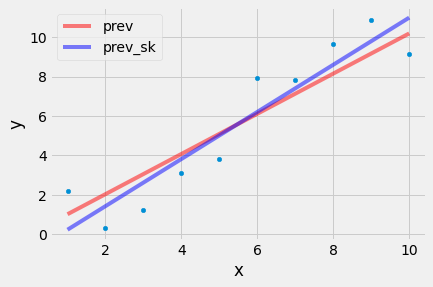

In [46]:
# plotando os dados e as duas retas de predições
# com o gradiente descendente caseiro
# com o modelo do Scikit-learn
ax = df_teste.plot.scatter(x='x', y='y')
df_teste.plot(x='x', y='prev', color='r', ax=ax, alpha=.5)
df_teste.plot(x='x', y='prev_sk', color='b', ax=ax, alpha=.5)

## Regressão Univariada


In [47]:
# mostra o dataframe de suicidios por ano
suicidios_por_ano

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Barbados,Belarus,Belgium,Belize,Bosnia and Herzegovina,Brazil,Bulgaria,Cabo Verde,Canada,Chile,Colombia,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Dominica,Ecuador,El Salvador,Estonia,Fiji,Finland,France,Georgia,Germany,Greece,Grenada,Guatemala,Guyana,Hungary,Iceland,Ireland,Israel,Italy,Jamaica,Japan,Kazakhstan,Kiribati,Kuwait,Kyrgyzstan,Latvia,Lithuania,Luxembourg,Macau,Maldives,Malta,Mauritius,Mexico,Mongolia,Montenegro,Netherlands,New Zealand,Nicaragua,Norway,Oman,Panama,Paraguay,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Romania,Russian Federation,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and Grenadines,San Marino,Serbia,Seychelles,Singapore,Slovakia,Slovenia,South Africa,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.00,134.47,NaN,NaN,163.41,384.81,NaN,4.76,20.12,61.72,NaN,332.04,NaN,NaN,59.18,303.12,NaN,166.46,108.91,62.56,69.46,NaN,NaN,NaN,NaN,NaN,0.0,82.52,NaN,NaN,NaN,NaN,348.90,NaN,NaN,58.17,25.08,NaN,NaN,NaN,171.05,102.16,112.03,133.40,9.04,300.47,NaN,NaN,11.20,NaN,NaN,NaN,247.39,NaN,NaN,8.76,143.13,38.17,NaN,NaN,159.89,153.64,NaN,NaN,NaN,51.06,39.42,NaN,NaN,164.82,154.61,NaN,146.65,NaN,NaN,NaN,NaN,32.79,NaN,NaN,156.18,353.36,NaN,NaN,NaN,114.93,558.72,470.84,NaN,NaN,82.54,30.17,NaN,NaN,NaN,NaN,116.45,184.72,178.61,NaN
1986,NaN,0.00,152.90,NaN,NaN,175.79,401.80,NaN,NaN,NaN,36.73,NaN,314.69,19.37,NaN,57.16,275.48,NaN,190.11,90.94,50.11,89.84,NaN,NaN,NaN,NaN,NaN,NaN,76.54,NaN,NaN,NaN,NaN,351.77,NaN,NaN,61.21,NaN,42.84,NaN,NaN,215.10,104.88,130.28,131.05,0.57,323.55,NaN,NaN,8.74,NaN,NaN,NaN,183.05,NaN,NaN,3.61,30.07,45.74,NaN,NaN,158.28,178.67,NaN,163.62,NaN,60.91,26.76,NaN,NaN,165.53,178.23,NaN,143.31,NaN,NaN,NaN,59.95,0.00,NaN,NaN,23.26,324.61,NaN,NaN,NaN,119.83,529.80,211.99,NaN,NaN,71.91,123.13,NaN,NaN,NaN,NaN,112.01,191.65,172.47,NaN
1987,31.85,0.00,144.98,NaN,NaN,188.82,405.88,NaN,13.59,25.68,29.46,NaN,327.76,31.41,NaN,70.12,308.40,NaN,179.33,89.42,45.17,85.56,NaN,NaN,NaN,NaN,NaN,NaN,62.53,NaN,NaN,NaN,347.35,331.03,NaN,NaN,63.06,NaN,57.92,NaN,NaN,209.94,95.42,133.61,125.54,7.78,295.29,NaN,NaN,11.47,NaN,NaN,NaN,243.24,NaN,NaN,18.87,171.94,41.43,NaN,NaN,157.17,210.52,NaN,191.56,NaN,67.06,36.60,NaN,NaN,171.33,143.76,NaN,128.24,NaN,NaN,NaN,141.42,0.00,NaN,NaN,60.72,273.56,NaN,NaN,NaN,122.14,NaN,251.70,230.91,NaN,81.82,155.54,NaN,173.61,294.04,NaN,103.81,191.66,164.43,NaN
1988,32.46,0.00,146.24,NaN,NaN,179.32,357.64,NaN,NaN,24.80,57.39,NaN,283.80,NaN,NaN,65.36,292.49,NaN,175.38,94.90,50.64,88.98,NaN,NaN,NaN,NaN,NaN,NaN,75.29,NaN,NaN,NaN,354.04,312.72,NaN,NaN,60.12,46.80,47.24,91.92,NaN,167.98,113.24,124.16,121.81,4.20,284.72,NaN,NaN,NaN,NaN,NaN,NaN,211.50,NaN,NaN,28.61,246.11,42.22,NaN,NaN,147.60,205.03,NaN,208.50,NaN,60.19,NaN,NaN,NaN,137.75,161.69,NaN,114.58,NaN,NaN,NaN,182.21,NaN,NaN,NaN,NaN,360.19,NaN,NaN,NaN,127.28,NaN,209.72,231.67,NaN,NaN,228.75,NaN,162.45,286.72,NaN,114.55,187.71,164.46,NaN
1989,33.40,0.00,138.93,NaN,NaN,168.11,359.32,NaN,NaN,NaN,73.58,NaN,284.85,5.16,NaN,64.02,292.19,NaN,170.98,100.44,41.69,84.77,NaN,NaN,NaN,NaN,NaN,NaN,70.38,NaN,NaN,NaN,373.36,312.53,NaN,NaN,54.53,65.09,35.23,184.88,NaN,110.12,110.56,170.32,116.64,0.00,263.42,NaN,NaN,NaN,NaN,NaN,NaN,261.32,NaN,NaN,89.96,211.64,48.26,NaN,NaN,136.01,190.62,NaN,197.89,NaN,55.29,35.33,NaN,NaN,130.32,169.54,NaN,121.40,157.77,398.82,NaN,88.91,NaN,NaN,NaN,NaN,354.11,NaN,NaN,NaN,126.49,NaN,212.12,238.34,NaN,NaN,198.16,NaN,135.33,316.32,NaN,99.19,182.44,196.46,NaN
1990,NaN,17.24,134.90,41.12,NaN,172.35,353.78,24.61,NaN,NaN,121.23,274.37,277.11,29.70,NaN,67.06,256.43,NaN,165.02,91.86,43.43,93.27,NaN,NaN,NaN,314.22,NaN,NaN,60.48,184.46,NaN,NaN,396.22,302.73,64.43,259.45,51.49,2

In [48]:
# Instacia o modelo de regessão linear
modelo = LinearRegression()

In [49]:
df_model = suicidios_por_ano.reset_index()[['year', 'Lithuania']].dropna()

In [50]:
X = df_model[['year']]
y = df_model[['Lithuania']]

In [51]:
# Treina o modelo (.fit()) de regressão linear
# com os dados da coluna CODIGO_GRAU_INSTRUCAO como entrada (X)
# e a coluna VALOR_BEM como saída (y)
modelo.fit(X=X, y=y)

LinearRegression()

In [52]:
# executa o modelo de regresão linear treinado para prever o valor de bens
# de acordo com cada grau de instrução (x)
df_model['PRED'] = modelo.predict(X)
df_model

country,year,Lithuania,PRED
10,1995,639.30,611.462332
11,1996,595.61,599.067132
12,1997,565.44,586.671931
13,1998,566.36,574.276731
14,1999,561.53,561.881530
15,2000,571.80,549.486330
16,2001,568.98,537.091129
17,2002,555.62,524.695929
18,2003,530.52,512.300728
19,2004,503.37,499.905528


In [53]:
# calcula o erro
df_model['ERRO'] = df_model['Lithuania'] - df_model['PRED']
df_model

country,year,Lithuania,PRED,ERRO
10,1995,639.30,611.462332,27.837668
11,1996,595.61,599.067132,-3.457132
12,1997,565.44,586.671931,-21.231931
13,1998,566.36,574.276731,-7.916731
14,1999,561.53,561.881530,-0.351530
15,2000,571.80,549.486330,22.313670
16,2001,568.98,537.091129,31.888871
17,2002,555.62,524.695929,30.924071
18,2003,530.52,512.300728,18.219272
19,2004,503.37,499.905528,3.464472


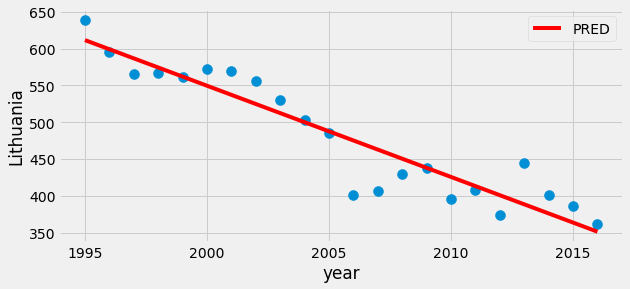

In [54]:
# plota o resultado da regressão linear
ax = df_model.plot.scatter(x='year', y='Lithuania', s=100, figsize=[9,4])
df_model.plot(x='year', y='PRED', c='r', ax=ax);

In [55]:
# do pacote Scikit-Learn, subpacote metrics, 
# importa a função de cálculo do MAE(Erro Médio Absoluto)
from sklearn.metrics import mean_absolute_error

In [56]:
# calcula o Erro Médio Absoluto usando o valor real
# e o valor predito pelo modelo
modelo_mae = mean_absolute_error(df_model['Lithuania'], df_model['PRED'])
modelo_mae

22.60493917150047

FIM